In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# full adder
# inputs  - 0=A 1=B 2=Carry in
# outputs - 2=Sum 3=Carry out 
qc=QuantumCircuit(4)
qc.ccx(0,1,3)
qc.cx(0,1)
qc.ccx(1,2,3)
qc.cx(1,2)
qc.cx(0,1)

In [3]:
qc.draw()

q_0: ──■────■──────────────■──
       │  ┌─┴─┐          ┌─┴─┐
q_1: ──■──┤ X ├──■────■──┤ X ├
       │  └───┘  │  ┌─┴─┐└───┘
q_2: ──┼─────────■──┤ X ├─────
     ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ┤ X ├─────┤ X ├──────────
     └───┘     └───┘

In [4]:
fullAdder=qc.to_gate(label='fullAdder')

In [5]:
twoBitAdd=QuantumCircuit(7,3)
twoBitAdd.x(0)
#add3.x(1)
twoBitAdd.x(4)
#add3.x(5)
twoBitAdd.append(fullAdder,[0,1,2,3])
twoBitAdd.append(fullAdder,[4,5,3,6])
twoBitAdd.barrier([0,1,2,3,4,5])
twoBitAdd.measure([2,3,6],[0,1,2])

In [6]:
twoBitAdd.draw()

┌───┐┌────────────┐               ░       
q_0: ┤ X ├┤0           ├───────────────░───────
     └───┘│            │               ░       
q_1: ─────┤1           ├───────────────░───────
          │  fullAdder │               ░ ┌─┐   
q_2: ─────┤2           ├───────────────░─┤M├───
          │            │┌────────────┐ ░ └╥┘┌─┐
q_3: ─────┤3           ├┤2           ├─░──╫─┤M├
     ┌───┐└────────────┘│            │ ░  ║ └╥┘
q_4: ┤ X ├──────────────┤0           ├─░──╫──╫─
     └───┘              │  fullAdder │ ░  ║  ║ 
q_5: ───────────────────┤1           ├─░──╫──╫─
                        │            │┌─┐ ║  ║ 
q_6: ───────────────────┤3           ├┤M├─╫──╫─
                        └────────────┘└╥┘ ║  ║ 
c: 3/══════════════════════════════════╩══╩══╩═
                                       2  0  1

In [7]:
simulator=Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

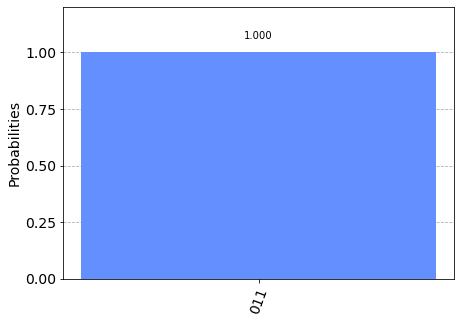

In [8]:
result=execute(twoBitAdd,backend=simulator).result()
plot_histogram(result.get_counts())